In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.special import comb

In [1]:
def geo_pmf(k, p):
    return (1-p)**(k-1) * p


def get_p(d, SUM_MAX=500):
    """Computes P(Geo(1-d) > Geo(1/2))
    This is the probability that a given bit "finds a partner."
    """
    res = sum([geo_pmf(k + l, 1-d) * geo_pmf(l, 1/2) for k in range(1, SUM_MAX) for l in range(1, SUM_MAX)])
    return res
    
def entr(d):
    try:
        res = []
        EPS = 1e-10
        for v in d:
            if abs(v) < EPS or abs(1-v) < EPS:
                res.append(0)
            else:
                res.append(-v*np.log2(v) -(1-v)*np.log2(1-v))
        return np.array(res)
    except TypeError:
        return -d*np.log2(d) -(1-d)*np.log2(1-d)

In [2]:
d_vals = np.linspace(0,1,100)
res = []
for d in d_vals:
    res.append((1-d)*2*get_p(d))

plt.plot(d_vals, res)

NameError: name 'np' is not defined

In [181]:
df = pd.DataFrame([d_vals, res]).T

In [182]:
df.to_csv("E_inf_lower_bound_with_correction.csv", header=False, index=False)

In [205]:
d_vals = np.linspace(0,1,100)[1:-1]

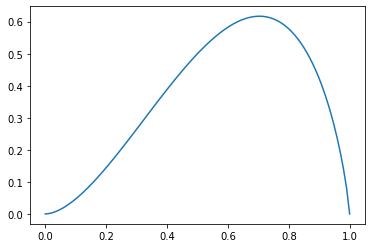

In [100]:
Y = (d_vals)* entr(1-d_vals)
plt.plot(d_vals, Y)

In [101]:
df = pd.DataFrame([d_vals, Y]).T

In [105]:
df.to_csv("E_inf_guess.csv", header=False, index=False)

In [209]:
ITERS = 5000
Y = []
for d in d_vals:
    y = 0
    p_avg = 0
    for t in range(ITERS):
        W = np.random.geometric(1 - d) - 1
        P = np.random.binomial(W, 1/2)
        y += np.log2(P + 1) / ITERS
    Y.append(y) 
Y = np.array(Y) * (1-d_vals)

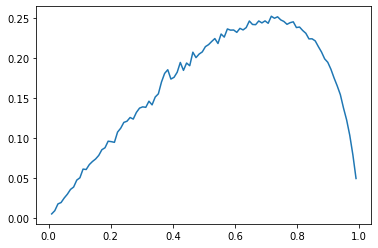

In [207]:
plt.plot(d_vals,Y)

In [198]:
df = pd.DataFrame([d_vals, Y]).T
df.to_csv("E_inf_lower_bound_with_partners_and_backswaps.csv", header=False, index=False)

In [211]:
ITERS = 5000
Y = []
for d in d_vals:
    y = 0
    for t in range(ITERS):
        k = np.random.binomial(np.random.geometric(1-d) - 1, 1/2)
        first_term = (1-d) * (1/2) * np.log2(k + 1)
        k_plus_ell = np.random.binomial(np.random.negative_binomial(2, 1-d), 1/2)
        second_term = (1-d)*(1/4)*np.log2(comb(k_plus_ell + 2, 2))
        y += (first_term + second_term) / ITERS
    Y.append(y) 
Y = np.array(Y)

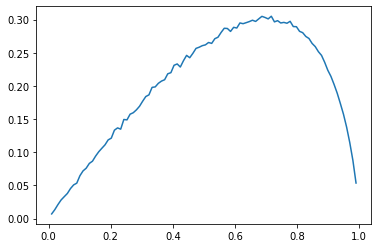

In [213]:
plt.plot(d_vals,Y)

In [173]:
ITERS = 5000
Y = []
k = 50
for d in d_vals:
    y = 0
    for t in range(ITERS):
        W = np.random.negative_binomial(k, 1-d)
        B = np.random.binomial(W, 1/2) + k
#         B = np.random.binomial(W, 1/2) 
        y += np.log2(comb(B, k)) / ITERS
    Y.append(y) 
Y = np.array(Y) * (1-d_vals) / k

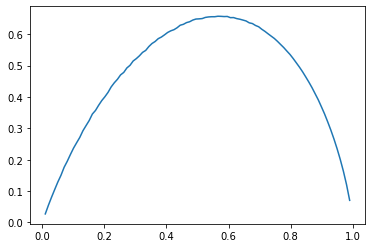

In [174]:
plt.plot(d_vals,Y)

In [175]:
df = pd.DataFrame([d_vals, np.array(Y)]).T
df.to_csv("E_inf_50_local_approx.csv", header=False, index=False)

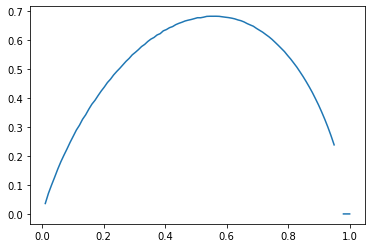

In [162]:
d_vals_list = list(d_vals) + [1]
Y_list = list(Y) + [0]
Y_list[-2]=0
plt.plot(d_vals_list, Y_list)

In [130]:
df = pd.DataFrame([d_vals_list, np.array(Y_list)]).T
df.to_csv("E_inf_1_local.csv", header=False, index=False)

In [135]:
Y_vals = (d_vals / (2*(1-d_vals)) + 1) * entr(1 / (d_vals / (2*(1-d_vals)) + 1) )

In [7]:
plt.plot(d_vals, Y_vals)

NameError: name 'd_vals' is not defined

In [12]:
d_vals = np.linspace(0,1,100)
Y_vals = 1/(1 + d_vals)* entr((1-d_vals)*(1+d_vals))

In [13]:
df =  pd.DataFrame([d_vals, Y_vals]).T
df.to_csv("my_heuristic_lower.csv", header=False, index=False)

In [14]:
d_vals = np.linspace(0,1,100)
# plt.plot(d_vals,Y_vals)

In [15]:
Y_vals = (1-d_vals/2) * entr((1-d_vals)/(1-d_vals/2))
df =  pd.DataFrame([d_vals, Y_vals]).T
df.to_csv("my_heuristic_upper.csv", header=False, index=False)

In [7]:
d_vals = np.linspace(0,1,100)
Y_vals = entr(d_vals) + d_vals * entr(1/(d_vals * (1+d_vals)) -1/d_vals + 1) - 1/(1+d_vals) * entr((1+d_vals)*(1-d_vals)) -d_vals - entr(d_vals)
Y_vals = -Y_vals

<ipython-input-7-feaa2275db6b>:2: RuntimeWarning: divide by zero encountered in true_divide
  Y_vals = entr(d_vals) + d_vals * entr(1/(d_vals * (1+d_vals)) -1/d_vals + 1) - 1/(1+d_vals) * entr((1+d_vals)*(1-d_vals)) -d_vals - entr(d_vals)
<ipython-input-7-feaa2275db6b>:2: RuntimeWarning: invalid value encountered in subtract
  Y_vals = entr(d_vals) + d_vals * entr(1/(d_vals * (1+d_vals)) -1/d_vals + 1) - 1/(1+d_vals) * entr((1+d_vals)*(1-d_vals)) -d_vals - entr(d_vals)


In [8]:
df =  pd.DataFrame([d_vals, Y_vals]).T
df.to_csv("my_heuristic_upper_v2.csv", header=False, index=False)